# 3.3 Setting up a Deep-Learning Workstation

This notebook provides lecture notes on setting up a workstation for deep learning experiments.

## Table of Contents

1.  Jupyter Notebooks: The preferred way to run deep-learning experiments
2.  Getting Keras running: Two options
3.  Running deep-learning jobs in the cloud: Pros and cons
4.  What is the best GPU for deep learning?

## 1. Jupyter Notebooks: The preferred way to run deep-learning experiments

Jupyter Notebooks are an open-source web application that allows you to create and share documents that contain live code, equations, visualizations, and narrative text. They are widely used in the deep learning community for their interactive nature and ability to combine code execution with explanations and visualizations.

### Why Jupyter Notebooks?

*   **Interactive Development:** Run code cells individually and see the output immediately.
*   **Code and Documentation in one place:** Combine code, markdown text, equations, and visualizations in a single document.
*   **Easy Sharing:** Share your notebooks with others for collaboration and reproducibility.
*   **Support for various languages:** While primarily used with Python, Jupyter supports many other languages.

### Example: Basic Python in a Jupyter Notebook

In [ ]:
# This is a simple Python code cell
a = 10
b = 20
c = a + b
print(f"The sum of a and b is: {c}")

The sum of a and b is: 30


### Example: Markdown and Equations

You can use Markdown to format your text and include mathematical equations using LaTeX syntax.

Here is an example of a simple equation:

$ E = mc^2 $

And a more complex one:

$ \frac{\partial L}{\partial w} = \frac{1}{N} \sum_{i=1}^N 2(y_i - \hat{y}_i)(-x_i) $

## 2. Getting Keras running: Two options

Keras is a high-level API for building and training deep learning models. It can run on top of different backend engines like TensorFlow, Theano, or CNTK. Here are two common ways to get Keras running:

### Option 1: Using TensorFlow with Keras

TensorFlow is an open-source machine learning library developed by Google. Keras is integrated into TensorFlow as `tf.keras`. This is the recommended way to use Keras.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


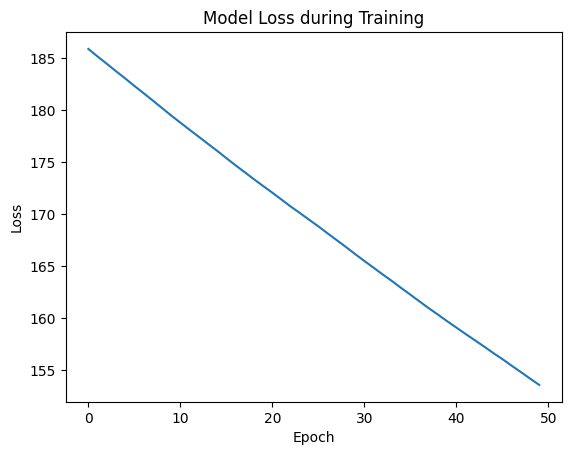

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction for x = 5: -0.343337744474411


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Generate some dummy data
x_train = np.random.rand(100, 1) * 10
y_train = 2 * x_train + np.random.randn(100, 1) * 2

# Build a simple sequential model
model = keras.Sequential([
    layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=50, verbose=0)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Predict on new data
x_test = np.array([[5]])
y_predict = model.predict(x_test)
print(f"Prediction for x = 5: {y_predict[0][0]}")

### Option 2: Using a standalone Keras installation (less common now)

Before Keras was integrated into TensorFlow, you could install it as a standalone library and configure a backend. This is less common now but still possible.


In [ ]:
{
    "image_data_format": "channels_last",
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "tensorflow"
}

{'image_data_format': 'channels_last',
 'epsilon': 1e-07,
 'floatx': 'float32',
 'backend': 'tensorflow'}

In [ ]:
# Note: This code requires a configured backend (e.g., tensorflow)
# from keras.models import Sequential
# from keras.layers import Dense
# import numpy as np

# # Generate some dummy data
# x_train = np.random.rand(100, 1) * 10
# y_train = 2 * x_train + np.random.randn(100, 1) * 2

# # Build a simple sequential model
# model = Sequential([
#     Dense(1, input_shape=(1,))
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# model.fit(x_train, y_train, epochs=50, verbose=0)

# # Predict on new data
# x_test = np.array([[5]])
# y_predict = model.predict(x_test)
# print(f"Prediction for x = 5: {y_predict[0][0]}")

## 3. Running deep-learning jobs in the cloud: Pros and cons

Running deep learning workloads in the cloud offers flexibility and scalability but also comes with considerations.

### Pros:

*   **Scalability:** Easily scale your compute resources up or down based on your needs.
*   **Cost-Effective for intermittent use:** Pay only for the resources you use, which can be cheaper than owning expensive hardware if you don't need it constantly.
*   **Access to powerful hardware:** Access the latest GPUs and other specialized hardware without significant upfront investment.
*   **Managed Services:** Cloud providers offer managed services for machine learning that simplify development and deployment.

### Cons:

*   **Cost for continuous use:** Running jobs continuously in the cloud can become more expensive than owning hardware in the long run.
*   **Data Transfer:** Moving large datasets to and from the cloud can be time-consuming and costly.
*   **Security and Privacy:** Data security and privacy concerns when working with sensitive data in the cloud.
*   **Complexity:** Setting up and managing cloud environments can be complex.

### Example: Conceptual Code for Cloud Training (using a placeholder library)

This is a conceptual example as actual cloud training setup varies significantly between providers (AWS, GCP, Azure, etc.) and services.

In [ ]:
# This is a conceptual example and requires a specific cloud SDK and setup
# import cloud_ml_library as cml

# # Assume you have your training script and data ready
# training_script = 'train.py'
# data_path = 'gs://my-bucket/my-data/' # Example for Google Cloud Storage
# model_output_path = 'gs://my-bucket/my-models/'

# # Configure the training job (example parameters)
# job_config = {
#     'scale_tier': 'CUSTOM',
#     'master_type': 'n1-standard-4',
#     'accelerator_config': {
#         'type': 'NVIDIA_TESLA_T4',
#         'count': 1
#     },
#     'package_uris': ['gs://my-bucket/my_package-1.0.tar.gz'], # Your code package
#     'python_module': 'trainer.task', # The entry point of your training code
#     'args': [
#         '--data_dir', data_path,
#         '--output_dir', model_output_path,
#         '--num_epochs', '10'
#     ]
# }

# # Submit the training job (conceptual call)
# # job = cml.submit_training_job('my-training-job', job_config)

# # print(f"Submitted job: {job.job_id}")
# # print(f"Job state: {job.state}")

## 4. What is the best GPU for deep learning?

Choosing the "best" GPU depends on your budget, the type of deep learning tasks you'll be performing, and whether you're building a personal workstation or using cloud resources.

### Key Factors to Consider:

*   **CUDA Cores:** More CUDA cores generally mean more parallel processing power.
*   **Memory (VRAM):** Larger models and larger batch sizes require more VRAM. This is often a limiting factor.
*   **Memory Bandwidth:** Higher memory bandwidth allows data to be transferred to and from the GPU memory faster.
*   **Tensor Cores:** Specialized cores on some NVIDIA GPUs that accelerate matrix multiplications, common in deep learning.
*   **Price:** GPUs can range from a few hundred to thousands of dollars.
*   **Power Consumption and Cooling:** High-performance GPUs consume a lot of power and require adequate cooling.

### Popular GPU Options (as of recent times):

*   **Entry-Level/Mid-Range:** NVIDIA RTX 3060, RTX 3070, RTX 4060, RTX 4070. Good for getting started and smaller projects.
*   **High-End Consumer:** NVIDIA RTX 3080, RTX 3090, RTX 4080, RTX 4090. Offer significant performance for more demanding tasks, but can be expensive. The RTX 3090 and 4090 are notable for their large VRAM.
*   **Professional/Data Center:** NVIDIA A100, H100. Designed for large-scale training and research, very expensive.

### Visualization: Comparing GPU Specs (Example Data)

Let's create a hypothetical visualization comparing some key specs of different GPUs.

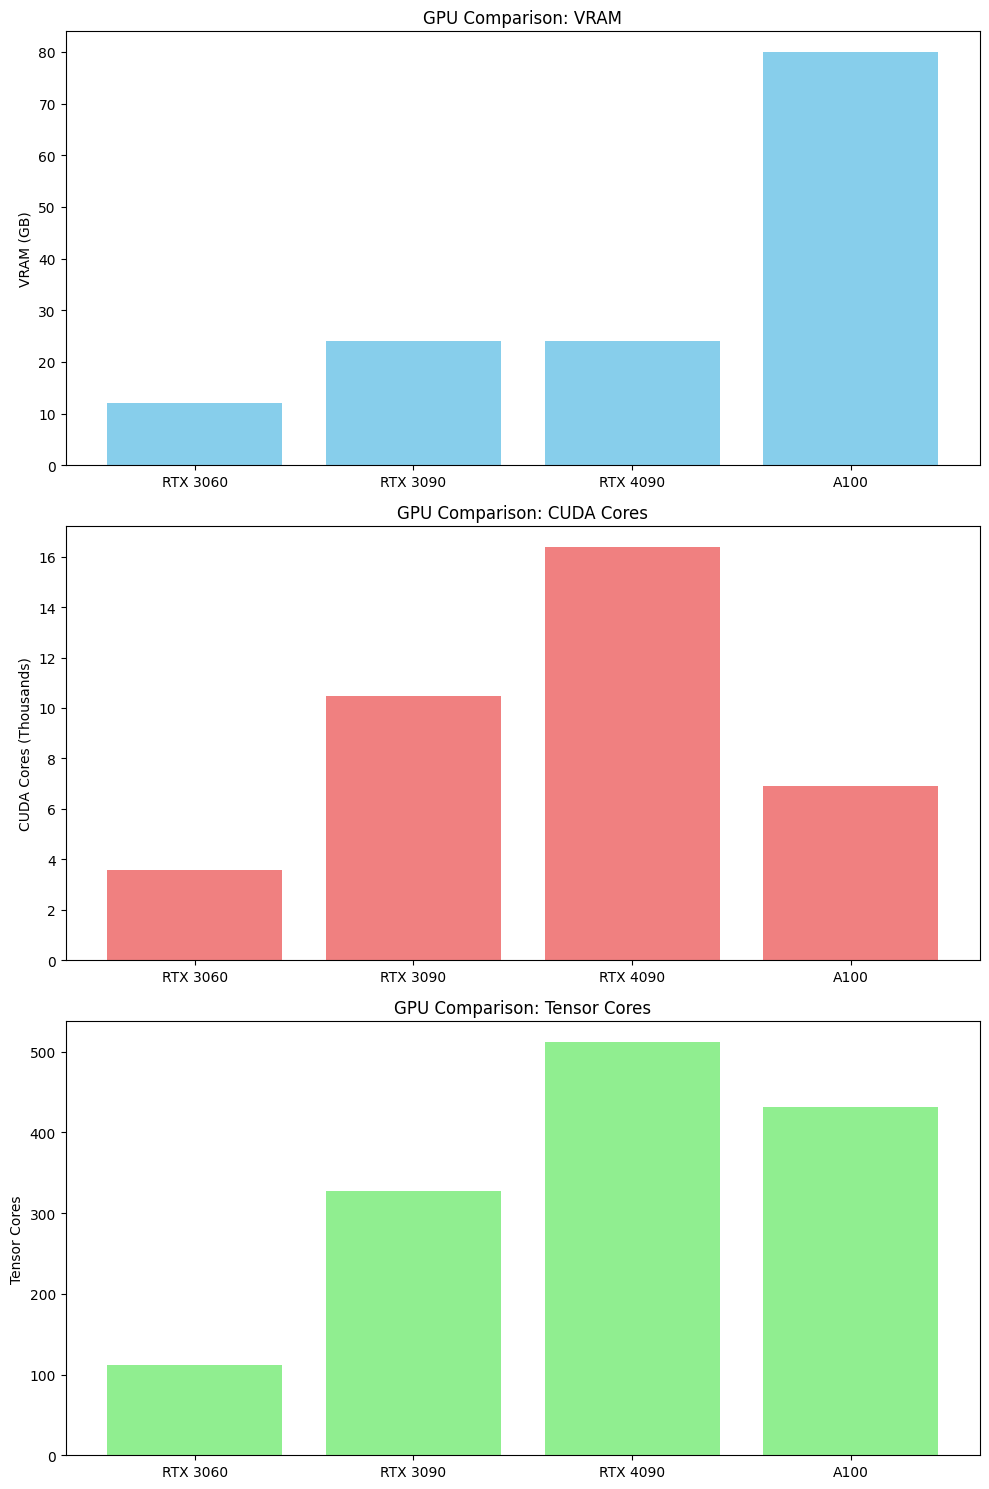

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Hypothetical data for demonstration
gpu_data = {
    'GPU': ['RTX 3060', 'RTX 3090', 'RTX 4090', 'A100'],
    'VRAM (GB)': [12, 24, 24, 80],
    'CUDA Cores (Thousands)': [3.58, 10.49, 16.38, 6.91], # Simplified for visualization
    'Tensor Cores': [112, 328, 512, 432] # Simplified for visualization
}

df_gpu = pd.DataFrame(gpu_data)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot VRAM
axes[0].bar(df_gpu['GPU'], df_gpu['VRAM (GB)'], color='skyblue')
axes[0].set_ylabel('VRAM (GB)')
axes[0].set_title('GPU Comparison: VRAM')

# Plot CUDA Cores
axes[1].bar(df_gpu['GPU'], df_gpu['CUDA Cores (Thousands)'], color='lightcoral')
axes[1].set_ylabel('CUDA Cores (Thousands)')
axes[1].set_title('GPU Comparison: CUDA Cores')

# Plot Tensor Cores
axes[2].bar(df_gpu['GPU'], df_gpu['Tensor Cores'], color='lightgreen')
axes[2].set_ylabel('Tensor Cores')
axes[2].set_title('GPU Comparison: Tensor Cores')

plt.tight_layout()
plt.show()

## Summary and Conclusion

*   This notebook provided lecture notes on setting up a deep-learning workstation.
*   We explored the benefits of using Jupyter Notebooks for interactive development and documentation.
*   We discussed how to get Keras running, focusing on the recommended approach using `tf.keras`.
*   We examined the pros and cons of running deep learning jobs in the cloud, considering factors like scalability, cost, and complexity.
*   We analyzed key factors for choosing a GPU for deep learning, including VRAM, CUDA cores, Tensor Cores, and price.
*   Choosing the right tools and hardware is essential for an effective deep learning environment.
*   Jupyter Notebooks offer a powerful platform for experimentation and documentation.
*   Understanding cloud computing and GPU selection is crucial for scaling deep learning efforts and optimizing performance and cost.